In [ ]:
# FUTURE_ML_02 — Support Ticket Classification & Prioritization
Future Interns Machine Learning Internship

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [2]:
# Loading support ticket dataset
df = pd.read_csv("../data/customer_support_tickets.csv")
df.head()
df.columns


Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

In [3]:
# Preparing text and labels
df["text"] = df["Ticket Description"].fillna("").astype(str)
df["category"] = df["Ticket Type"].astype(str)
df["priority"] = df["Ticket Priority"].astype(str)


In [4]:
# Train/Test split for CATEGORY classification
X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["category"], test_size=0.2, random_state=42, stratify=df["category"]
)


In [5]:
# Building category classification pipeline

# Pipeline steps:
# 1. TF-IDF converts text into numeric features
# 2. Logistic Regression learns patterns in ticket wording
cat_model = Pipeline([
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words="english", max_features=50000)),
    ("clf", LogisticRegression(max_iter=2000))
])

cat_model.fit(X_train, y_train)
pred = cat_model.predict(X_test)


In [6]:
print(classification_report(y_test, pred))


                      precision    recall  f1-score   support

     Billing inquiry       0.19      0.17      0.18       327
Cancellation request       0.20      0.21      0.21       339
     Product inquiry       0.23      0.22      0.23       328
      Refund request       0.19      0.19      0.19       351
     Technical issue       0.21      0.22      0.21       349

            accuracy                           0.20      1694
           macro avg       0.20      0.20      0.20      1694
        weighted avg       0.20      0.20      0.20      1694



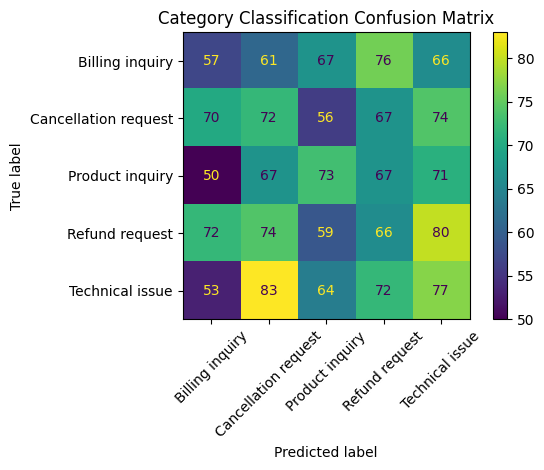

In [7]:
# Confusion Matrix Visualization

# It shows where model confuses categories
cm = confusion_matrix(y_test, pred, labels=cat_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cat_model.classes_)
disp.plot(xticks_rotation=45)
plt.title("Category Classification Confusion Matrix")
plt.tight_layout()
plt.show()


In [8]:
plt.savefig("../outputs/category_confusion_matrix.png", dpi=200)


<Figure size 640x480 with 0 Axes>

In [9]:
# Train/Test split for PRIORITY prediction
X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["priority"], test_size=0.2, random_state=42, stratify=df["priority"]
)


In [10]:
# Priority prediction pipeline
prio_model = Pipeline([
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words="english", max_features=50000)),
    ("clf", LogisticRegression(max_iter=2000))
])

prio_model.fit(X_train, y_train)
pred = prio_model.predict(X_test)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

    Critical       0.27      0.28      0.27       426
        High       0.28      0.25      0.27       417
         Low       0.24      0.23      0.23       413
      Medium       0.27      0.29      0.28       438

    accuracy                           0.26      1694
   macro avg       0.26      0.26      0.26      1694
weighted avg       0.26      0.26      0.26      1694



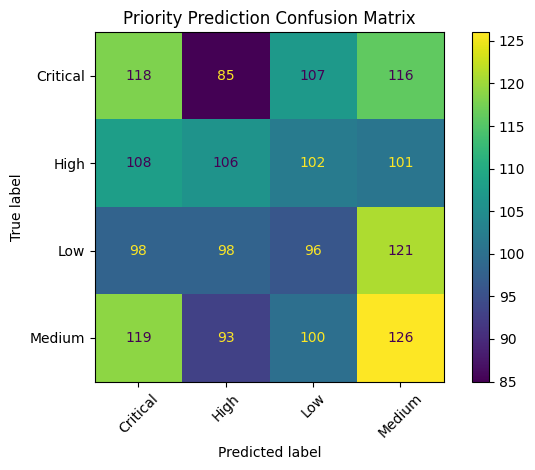

<Figure size 640x480 with 0 Axes>

In [11]:
# Priority Confusion Matrix
cm = confusion_matrix(y_test, pred, labels=prio_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=prio_model.classes_)
disp.plot(xticks_rotation=45)
plt.title("Priority Prediction Confusion Matrix")
plt.tight_layout()
plt.show()
plt.savefig("../outputs/priority_confusion_matrix.png", dpi=200)


In [12]:
# Demo: Predicting new incoming tickets
examples = [
    "My payment was deducted twice, please refund immediately.",
    "I cannot log into my account since yesterday.",
    "How do I change my subscription plan?"
]

for t in examples:
    print("\nTICKET:", t)
    print("Predicted Category:", cat_model.predict([t])[0])
    print("Predicted Priority:", prio_model.predict([t])[0])



TICKET: My payment was deducted twice, please refund immediately.
Predicted Category: Technical issue
Predicted Priority: Critical

TICKET: I cannot log into my account since yesterday.
Predicted Category: Cancellation request
Predicted Priority: High

TICKET: How do I change my subscription plan?
Predicted Category: Product inquiry
Predicted Priority: Low
